In [ ]:
# Make sure that the companion csv 'football_complete.csv' is in the SAME directory as this jupyter notebook
# Look up the documentation for any of these functions you don't understand; all of them are extremely helpful
# when looking at new data and trying to clean it up.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('football_complete.csv', index_col='Unnamed: 0')

In [47]:
# Example for plotting a basic chart to visualize the data

In [48]:
# Rushing attempts
x = list(df['Att'])

In [49]:
# Rushing yardage gained (total)
y = list(df['Yds'])

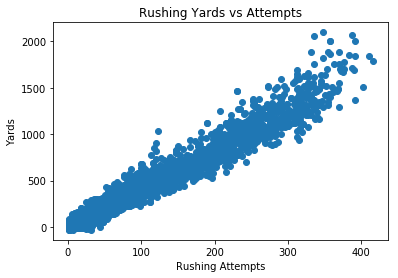

In [51]:
# Correlation between rushing yards and rushing attempts
plt.scatter(x, y)
plt.xlabel('Rushing Attempts')
plt.ylabel('Yards')
plt.title('Rushing Yards vs Attempts')
plt.show()
#plt.savefig('inclass_qbs.png') would save our graph to a png file if we desired

In [7]:
df.head(2)

Unnamed: 1   Tm  Age Pos   G  GS  Att   Yds  TD  Lng ...   \
0  Edgerrin James*+\JameEd00  IND   21  RB  16  16  369  1553  13   72 ...    
1     Curtis Martin\MartCu00  NYJ   26  RB  16  16  367  1464   5   50 ...    

   TD.1  Lng.1  R/G  Y/G.1  Ctch%  Touch  Y/Tch  YScm  RRTD  Fmb  
0   4.0   54.0  3.9   36.6  75.6%    431    5.0  2139    17    8  
1   0.0   34.0  2.8   16.2  91.8%    412    4.2  1723     5    2  

[2 rows x 27 columns]

In [18]:
df.isnull().values.any()

False

In [17]:
df = df.fillna(0)

In [23]:
df.columns.tolist()

['Unnamed: 1',
 'Tm',
 'Age',
 'Pos',
 'G',
 'GS',
 'Att',
 'Yds',
 'TD',
 'Lng',
 'Y/A',
 'Y/G',
 'A/G',
 'Tgt',
 'Rec',
 'Yds.1',
 'Y/R',
 'TD.1',
 'Lng.1',
 'R/G',
 'Y/G.1',
 'Ctch%',
 'Touch',
 'Y/Tch',
 'YScm',
 'RRTD',
 'Fmb']

In [24]:
df = df.sort_values(by=['Yds', 'RRTD', 'Age'], ascending=False)

In [34]:
age_22 = df.loc[(df['Age']==22) & (df['GS']>9)]
age_22.head(2)

Unnamed: 1   Tm  Age Pos   G  GS  Att   Yds  TD  Lng ...   \
3164  Edgerrin James*\JameEd00  IND   22  RB  16  16  387  1709  13   30 ...    
2227  Clinton Portis*\PortCl00  DEN   22  RB  13  13  290  1591  14   65 ...    

      TD.1  Lng.1  R/G  Y/G.1  Ctch%  Touch  Y/Tch  YScm  RRTD  Fmb  
3164   5.0   60.0  3.9   37.1  72.4%    450    5.1  2303    18    5  
2227   0.0   72.0  2.9   24.2  74.5%    328    5.8  1905    14    3  

[2 rows x 27 columns]

In [37]:
df['t_pts'] = (df['Rec'] + df['RRTD']*6 + df['YScm']*.1)
df['f_ppg'] = (df['t_pts']/df['G']).round(1)

In [39]:
df.head(2)

Unnamed: 1   Tm  Age    Pos   G  GS  Att   Yds  TD  Lng  \
1576  Adrian Peterson*+\PeteAd01  MIN   27     RB  16  16  348  2097  12   82   
2215      Jamal Lewis*+\LewiJa00  BAL   24  fb/RB  16  16  387  2066  14   82   

      ...    R/G  Y/G.1  Ctch%  Touch  Y/Tch  YScm  RRTD  Fmb  t_pts  f_ppg  
1576  ...    2.5   13.6  78.4%    388    6.0  2314    13    4  349.4   21.8  
2215  ...    1.6   12.8  68.4%    413    5.5  2271    14    8  337.1   21.1  

[2 rows x 29 columns]

In [44]:
# TODO: Use df.apply() on our df so that our names column 
# (df['Unnamed: 1']) look human-readable like 'Firstname Lastname'

In [45]:
# TODO: Set the names column as our index, rather than these arbitrary integers

In [46]:
# TODO: Make sure all of our data is numerical (type == float or int). This may mean
# dropping some columns, and our 'Ctch%' is also currently a str instead of float

In [ ]:
# To make comparisons, we will have a separate df of all players from 2017 that we can pull data from.
# We will then use that data (a row) to generate similarities based on cosines from our larger matrix
# All the linear algebra will actually be computed using the scikit-learn library along with pandas.
# We'll write a module for that later in the week once our data is ready for analysis.